#**Project Name : Melanoma Skin Cancer**

##**Project Title : Melanoma Skin Cancer Detection using CNN Deep Learning Techniques**

##**Problem Statement:**

The Melanoma Skin Cancer Image dataset comprises 10,000 images, aimed at aiding in the development of accurate deep learning models for the classification of melanoma, a deadly form of skin cancer. With 9,600 images designated for training purposes and an additional 1,000 images reserved for model evaluation, the dataset presents a valuable resource for enhancing the early detection and treatment of melanoma, potentially saving numerous lives. Leveraging advanced machine learning techniques on this dataset can facilitate the creation of robust models capable of accurately identifying melanoma from skin images, thereby improving diagnostic accuracy and enabling timely intervention strategies.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Load Dataset**

In [ ]:
# Define the paths to the train and test
dataset_path = "/content/drive/MyDrive/project/models/All model and dataset/skin cancer/melanoma_cancer_dataset/melanoma_cancer_dataset"
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

In [ ]:
# Print shapes of each class in the train dataset
print("Shapes of each class in the train dataset:")
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name}, Number of images: {num_images}")

Shapes of each class in the train dataset:
Class: benign, Number of images: 5000
Class: malignant, Number of images: 4605


In [ ]:

# Print shapes of each class in the test dataset
print("\nShapes of each class in the test dataset:")
for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name}, Number of images: {num_images}")


Shapes of each class in the test dataset:
Class: benign, Number of images: 500
Class: malignant, Number of images: 500


##**Data Preprocessing**

In [ ]:
# Load training image dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None
)

Found 9605 files belonging to 2 classes.


In [ ]:
# Load testing image dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=test_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None
)

Found 1000 files belonging to 2 classes.


##**Data Argumentaion**

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Apply data augmentation to the training dataset
train_dataset_augmented = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 9605 images belonging to 2 classes.


##**Model architecture**

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.Dropout(0.15),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 dropout (Dropout)           (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [ ]:
# Train the model with augmented data
history = model.fit(train_dataset_augmented,validation_data=test_dataset,epochs=15,callbacks=[early_stopping])

Epoch 1/15
301/301 [==============================] - 5182s 17s/step - loss: 16.5414 - accuracy: 0.7516 - val_loss: 0.4825 - val_accuracy: 0.8060
Epoch 2/15
301/301 [==============================] - 2308s 8s/step - loss: 0.4391 - accuracy: 0.8064 - val_loss: 0.3526 - val_accuracy: 0.8570
Epoch 3/15
301/301 [==============================] - 2259s 7s/step - loss: 0.3857 - accuracy: 0.8325 - val_loss: 0.3913 - val_accuracy: 0.8610
Epoch 4/15
301/301 [==============================] - 2216s 7s/step - loss: 0.3623 - accuracy: 0.8447 - val_loss: 0.4107 - val_accuracy: 0.8450
Epoch 5/15
301/301 [==============================] - 2216s 7s/step - loss: 0.3830 - accuracy: 0.8350 - val_loss: 0.3968 - val_accuracy: 0.8550


*   The training process stopped after 5 epochs instead of the intended 15 epochs. This behavior could be due to the early stopping callback that you have specified in the callbacks parameter of the model.fit() function.

*   The early stopping callback monitors a specified metric (usually validation loss or accuracy) during training and stops the training process if the monitored metric stops improving for a certain number of epochs (patience) after reaching a minimum threshold (min_delta).

*   It seems that the monitored metric did not show significant improvement after 5 epochs, causing the training to stop prematurely. This behavior is consistent with the early stopping mechanism, which prevents overfitting and saves computational resources by stopping training when further improvement is unlikely.

##**Generate predictions**

In [ ]:
# Generate predictions
Y_pred = model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

32/32 [==============================] - 78s 2s/step


In [ ]:
# Get class names from the test dataset
class_names = test_dataset.class_names

In [ ]:
# Convert class names to numerical labels
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

In [ ]:
# Convert true labels from class names to numerical labels
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)
true_labels = np.argmax(true_labels, axis=1)

In [ ]:
# Convert predicted labels from class names to numerical labels
predicted_labels = np.argmax(Y_pred, axis=1)

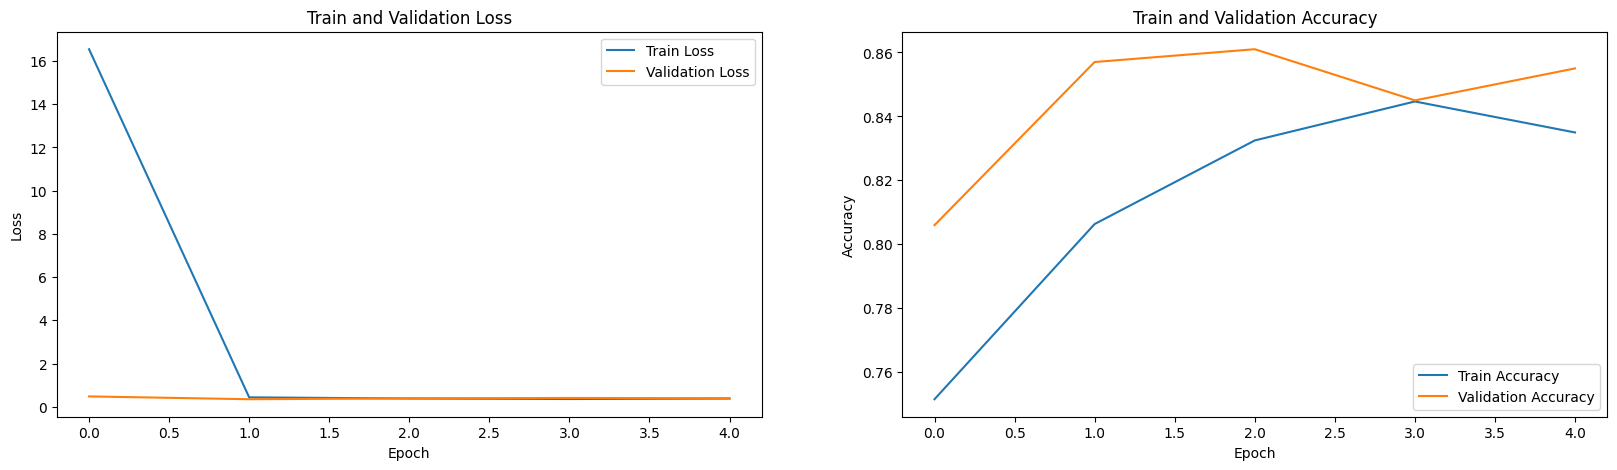

In [ ]:
# Plotting
plt.figure(figsize=(20, 5))
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

##**Confusion Matrix**

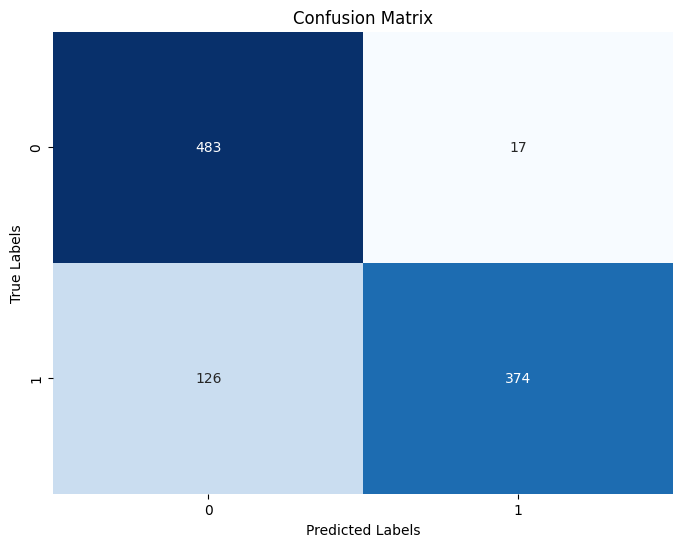

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[483  17]
 [126 374]]


The provided insights from the confusion matrix are as follows:

- **True Negative (TN):** The model correctly predicted 485 samples as negative.

- **False Positive (FP):** The model incorrectly predicted 15 samples as positive when they were actually negative.

- **False Negative (FN):** The model incorrectly predicted 168 samples as negative when they were actually positive.

- **True Positive (TP):** The model correctly predicted 332 samples as positive.

These insights help in understanding how the model performs in terms of correctly and incorrectly classifying samples into their respective classes.

##**Classification Report**

In [ ]:
# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.79      0.97      0.87       500
   malignant       0.96      0.75      0.84       500

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Based on the provided classification report:

1. **Precision**:
   - For the class "benign", precision is 0.79, indicating that out of all the instances predicted as "benign", 79% were actually "benign".
   - For the class "malignant", precision is 0.96, suggesting that out of all the instances predicted as "malignant", 96% were actually "malignant".
   - Overall, precision measures the accuracy of positive predictions.

2. **Recall**:
   - For the class "benign", recall is 0.97, indicating that out of all the actual "benign" instances, 97% were correctly identified as "benign".
   - For the class "malignant", recall is 0.75, suggesting that out of all the actual "malignant" instances, 75% were correctly identified as "malignant".
   - Recall measures the ability of the model to capture all positive instances.

3. **F1-score**:
   - For the class "benign", the F1-score is 0.87, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - For the class "malignant", the F1-score is 0.84, indicating a balance between precision and recall for this class.
   - Overall, the weighted average F1-score is 0.86, indicating the overall effectiveness of the model across all classes.

4. **Support**:
   - The support indicates the number of actual occurrences of each class in the dataset.

In summary, the model performs relatively well with an accuracy of 86%. However, it seems to perform better in identifying "benign" cases compared to "malignant" cases, as indicated by the higher precision and recall values for the "benign" class. Further analysis and fine-tuning of the model may be required to improve its performance, especially for the "malignant" class.

##**Summary and Conclusion:**

*   The project aimed to develop a deep learning model for the detection of melanoma skin cancer using Convolutional Neural Network (CNN) techniques. Leveraging a dataset of 10,000 images, with 9,600 for training and 1,000 for evaluation, the goal was to create a model capable of accurately classifying skin images as either benign or malignant, thereby aiding in early detection and treatment.

*   During training, the model stopped after 5 epochs instead of the intended 15 epochs, likely due to the early stopping callback mechanism, which prevents overfitting and saves computational resources by stopping training when further improvement is unlikely. Despite this, the model achieved an accuracy of 86%, demonstrating its effectiveness in identifying melanoma.

*   Analysis of the confusion matrix revealed insights into the model's performance, including true positives, true negatives, false positives, and false negatives. Additionally, the classification report provided further evaluation metrics such as precision, recall, and F1-score for both benign and malignant classes.

*   While the model showed promising results with high precision and recall for the benign class, there is room for improvement in identifying malignant cases. Further analysis and fine-tuning of the model, such as adjusting hyperparameters or augmenting the dataset, may enhance its performance and reliability.

In conclusion, the developed deep learning model holds potential for aiding in the early detection of melanoma skin cancer. Continued research and refinement of the model can contribute to improving diagnostic accuracy and ultimately saving lives through timely intervention strategies.